In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

<font size='4'>**Carichiamo il dataset dentro alla nostra variabile df** </font>

In [2]:
#salviamo il dataframe dentro alla variabile df
df = pd.read_csv('master.csv')

In [12]:
df

,country,year,sex,age,suicides_no,population
0,Albania,1987,male,15-24 years,21,312900
1,Albania,1987,male,35-54 years,16,308000
2,Albania,1987,female,15-24 years,14,289700
3,Albania,1987,male,75+ years,1,21800
4,Albania,1987,male,25-34 years,9,274300
...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833
27816,Uzbekistan,2014,female,75+ years,9,348465
27817,Uzbekistan,2014,male,5-14 years,60,2762158
27818,Uzbekistan,2014,female,5-14 years,44,2631600


<font size='4'>**Eliminiamo alcune colonne che non ci interessano** </font>

In [4]:
df.drop('HDI for year', axis=1, inplace = True)

In [5]:
df.drop(df.columns[[9]], axis=1, inplace = True)

In [6]:
df.drop(df.columns[[9]], axis=1, inplace = True)

In [7]:
df.drop(df.columns[[8]], axis=1, inplace = True)

In [8]:
df.drop(df.columns[[7]], axis=1, inplace = True)

In [9]:
df.drop(df.columns[[6]], axis=1, inplace = True)

<font size='4'>**Stampiamo il numero totale di uomini e donne** </font>

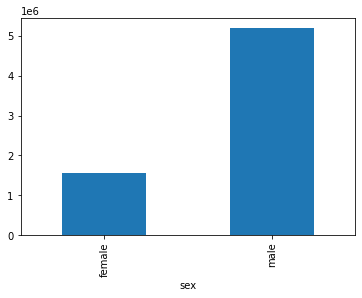

In [10]:
df.groupby('sex').suicides_no.sum().plot.bar(stacked=True);

<font size='4'>**Stampiamo il numero di suicidi per fasce d'età** </font>

In [94]:
#andiamo a creare una variabile order per stabilire in che ordine i dati andranno
# poi rappresentati lungo l'asse x dei nostri grafici
order = ["5-14 years","15-24 years","25-34 years","35-54 years","55-74 years","75+ years"]

<AxesSubplot:xlabel='age'>

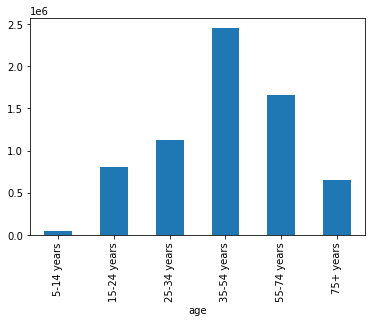

In [95]:
a = df.groupby('age').suicides_no.sum()
a.loc[order].plot.bar()

<font size='4'>**Stampiamo il numero di suicidi per fasce d'età, divisi per sesso** </font>

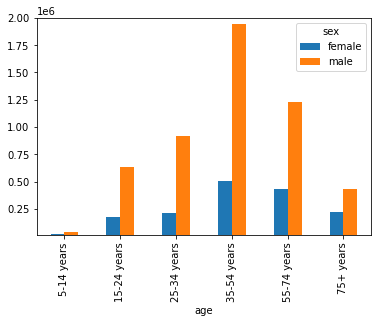

In [97]:
b = df.groupby(['age', 'sex']).suicides_no.sum()
b.unstack().loc[order].plot.bar().set_ylim(10000,2000000);

<font size='4'>**Stampiamo il numero di suicidi per anno** </font>

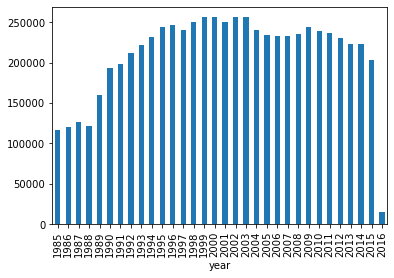

In [67]:
df.groupby('year').suicides_no.sum().plot.bar(stacked=True);

<font size='2'>Dai dati si evince che da fine anni '80 c'è stato un notevole incremento di suicidi, non ne è possibile determinare con certezza la causa, ma sappiamo che il tasso di suicidi è solito salire a causa, oltre che di crisi familiari e individuali, di crisi socioeconomiche</font>

<font size='4'>**Regressione lineare** </font>

In [78]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

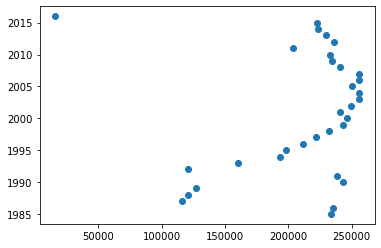

In [80]:
#assegnamo X e Y per la regressione, al primo assegnamo il numero di suicidi per anno, al secondo gli anni
X = df.groupby('year').suicides_no.sum().to_numpy().reshape(-1,1)
Y = df['year'].unique()

plt.scatter(X, Y)

<font size='4'>**Visto che i dati del 2016 sono incompleti abbiamo deciso di escluderlo** </font>

In [81]:
X = X[:-1]

In [84]:
Y = Y[:-1]

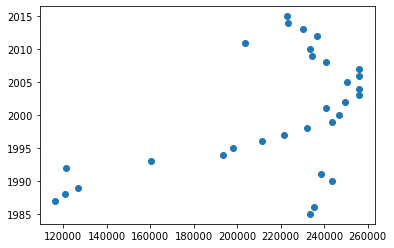

In [85]:
plt.scatter(X, Y)

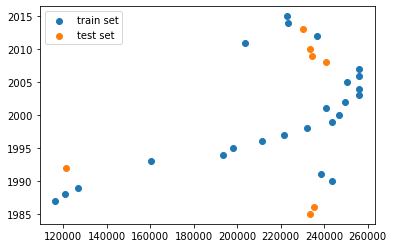

In [86]:
#splittiamo i dati in due set, quello di train per allenare la regressione
#e quello di test per verificarne in funzionamento 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1)
plt.scatter(X_train, Y_train, label='train set')
plt.scatter(X_test, Y_test, label='test set')
plt.legend()
plt.show()

In [87]:
#creiamo la regressione 
reg = LinearRegression()

In [88]:
#alleniamo la regressione sul train set
reg.fit(X_train, Y_train)

LinearRegression()

In [89]:
#effettuiamo la previsione passandogli il test set
Y_pred = reg.predict(X_test)

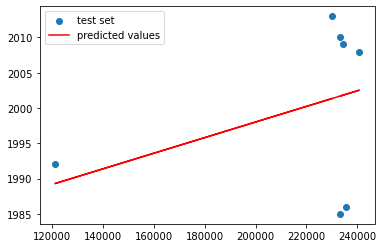

In [90]:
plt.scatter(X_test, Y_test, label='test set')
plt.plot(X_test, Y_pred, color='red', label='predicted values')
plt.legend()
plt.show()